### Prim's algo to find max possible speed to not break speed limit

In [7]:
import networkx as nx, matplotlib, matplotlib.pyplot as plt, numpy as np

Undirected Graph:


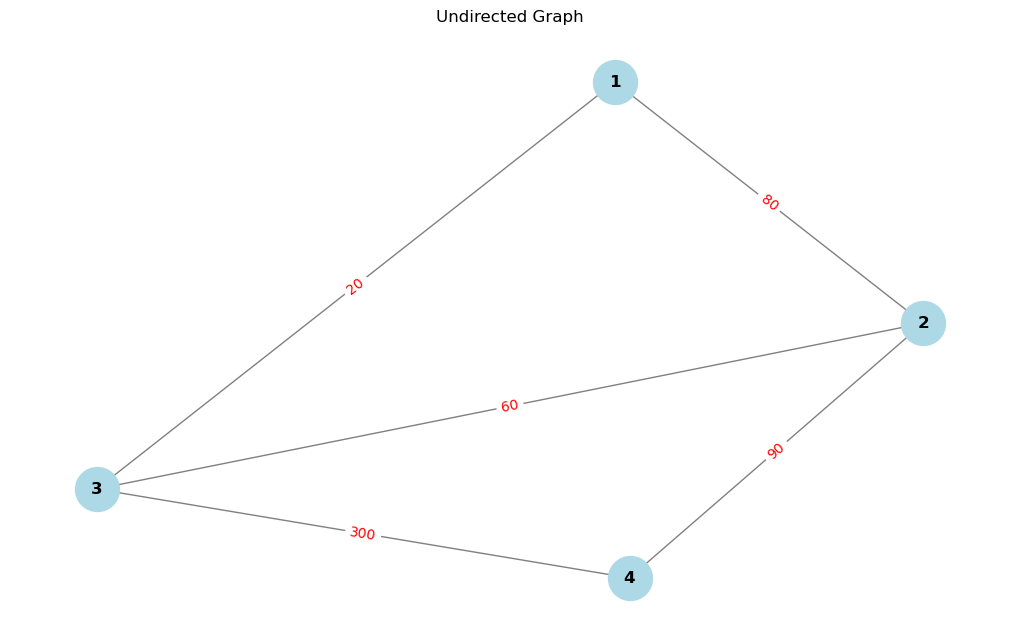

Directed Graph:


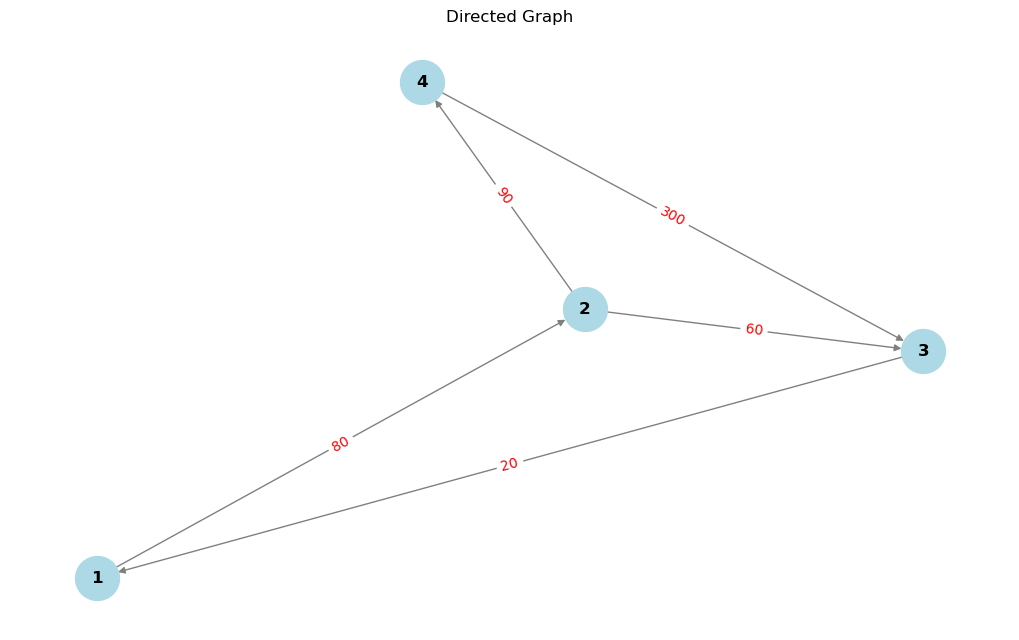

In [8]:
# Define the graph edges with weights (for demonstration purposes)
edges = [
    (1, 2, 80),
    (4, 3, 300),
    (3, 1, 20),
    (2, 4, 90),
    (2, 3, 60)
]

def draw_graph(edges, directed=False):
    # Create a directed or undirected graph based on the 'directed' flag
    G = nx.DiGraph() if directed else nx.Graph()
    
    # Add weighted edges to the graph
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)
        
    # Get positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

    # Draw nodes and edges
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color='gray')
    
    # Draw edge labels to display weights
    edge_labels = {(u, v): f'{w}' for u, v, w in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    title = "Directed Graph" if directed else "Undirected Graph"
    plt.title(title)
    plt.show()

# Draw undirected graph
print("Undirected Graph:")
draw_graph(edges, directed=False)

# Draw directed graph
print("Directed Graph:")
draw_graph(edges, directed=True)


In [9]:
def findmax(N, edges):
    # create adjacency matrix
    adj = [[0]* N for _ in range(N)]
    for u,v, weight in edges:
        u,v = u-1,v-1
        adj[u][v] = weight
        adj[v][u] = weight
        # undirected graph symmetric matrix
        
    # prim's algo
    speed = [0]*N
    speed[0] = float('inf')
    visited = [False]*N
    
    # find path with maximum possible speed
    for _ in range(N):
        max_speed = -1
        u = -1
        
        # find unvisited vertx with maximum speed
        for i in range(N):
            if not visited[i] and speed[i] > max_speed:
                max_speed = speed[i]
                u = i
        if u == -1:
            break
        visited[u] == True
        
        # update max speeds through current vertex
        for v in range(N):
            if adj[u][v] > 0 and not visited[v]:
                # maximum possible speed is minimum of current path and new road 
                # and then we are maximizing mary's speed
                speed[v] = max(min(speed[u], adj[u][v]), speed[v])
    
    print(adj)
    return speed[N-1]

In [10]:
# Test
N= 4
M= 5
edges = [[1,2,80],[4,3,300],[3,1,20],[2,4,90],[2,3,60]]

print(findmax(N, edges))

[[0, 80, 20, 0], [80, 0, 60, 90], [20, 60, 0, 300], [0, 90, 300, 0]]
0
